In [1]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2)))

In [2]:
cell_type = "PBMC"
# path set
input_file_path <- file.path(paste0("../results/","regression/",cell_type))
# read in the data
output_path <- file.path(paste0("../figures/","regression/",cell_type,"/"))
# create output directory if it doesn't exist
dir.create(output_path, recursive = TRUE, showWarnings = FALSE)

In [3]:
files <- list.files(path = input_file_path, pattern = "*.csv", full.names = TRUE)

In [6]:
# define empty df with column names
model_df <- data.frame(
    secreted_proteins = character(),
    shuffle = character(),
    l1_ratio = numeric(),
    alpha = numeric(),
    r2 = numeric()
)

In [7]:
for (i in 1:length(files)){
    df <- read.csv(files[i], header = TRUE, sep = ",", stringsAsFactors = FALSE)
    df <- df[1,]
    # drop columns that are not needed
    df <- df[,c("secreted_proteins","shuffle","l1_ratio","alpha","r2")]
    # append to model_df
    model_df <- rbind(model_df, df)
}
head(model_df)

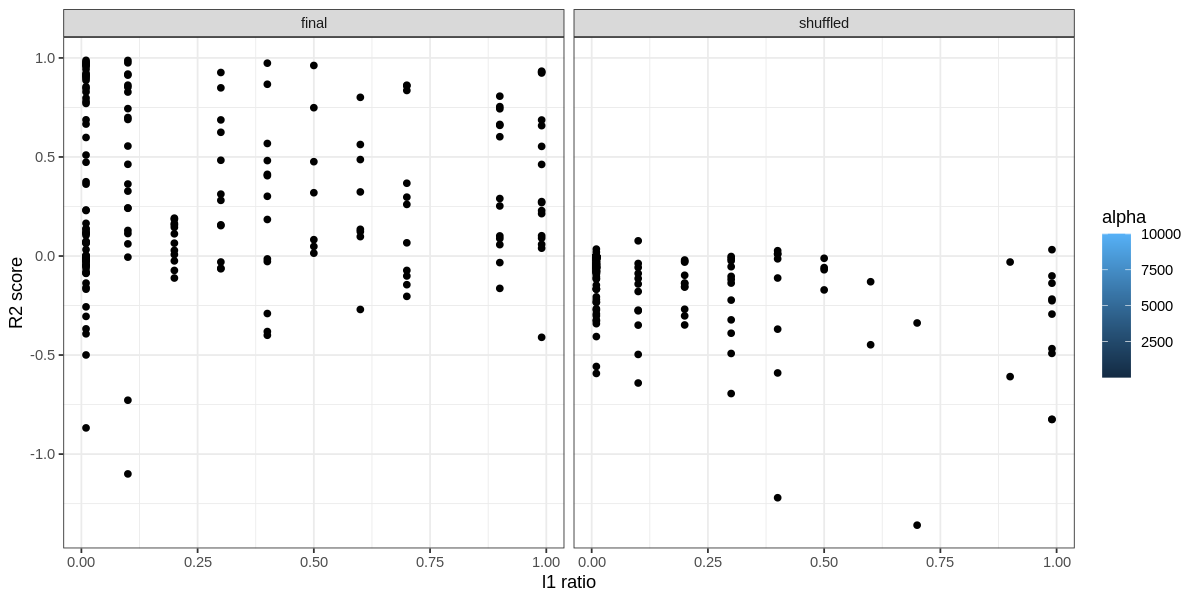

In [43]:
# plot soze
options(repr.plot.width=10, repr.plot.height=5)
# plot model parameters
model_params_plot <- (
    ggplot(model_df, aes(x=l1_ratio, y=r2, fill=alpha))
    + geom_point()
    + theme_bw()
    + facet_wrap(.~shuffle, ncol=2)
    + labs(x="l1 ratio", y="R2 score", color="alpha")
)
model_params_plot